In [1]:
import os

In [2]:
os.chdir("C:/Users/Michael/Documents/DataSet/Goods_and_restaurants")

In [3]:
import pandas as pd
import numpy as np

In [4]:
#Чтение данных из таблицы
Product = pd.read_csv('PRODUCT_LIST.CSV', delimiter=';', encoding='cp1251')

In [5]:
#Просмотр первых 5 строчек таблицы
Product.head()

,product_code,product_name,Unnamed: 2,Unnamed: 3
0,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN
1,821002,Кофе ДОППИО 60мл,NaN,NaN
2,821003,Кофе РИСТРЕТТО 20 мл,NaN,NaN
3,821004,Фильтр кофе Верньяно250мл,NaN,NaN
4,821005,Кофе ЛУНГО 50 мл,NaN,NaN


In [6]:
Product.dtypes

product_code     int64
product_name    object
Unnamed: 2      object
Unnamed: 3      object
dtype: object

In [7]:
#Чтение данных из таблицы
Sale = pd.read_csv('SALE_LIST.csv', delimiter=';', encoding='cp1251')

In [8]:
#Просмотр первых 5 строчек таблицы
Sale.head()

,date,product_code,rest_code,product_count
0,06.01.2009,824021,Озерный,4
1,06.01.2009,824068,Озерный,1
2,06.01.2009,824070,Озерный,2
3,06.01.2009,824073,Озерный,1
4,06.01.2009,824074,Озерный,1


In [9]:
Sale.dtypes

date             object
product_code      int64
rest_code        object
product_count     int64
dtype: object

In [10]:
print (Sale['rest_code'].value_counts())

Мечта      73690
Озерный    62230
Name: rest_code, dtype: int64


In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

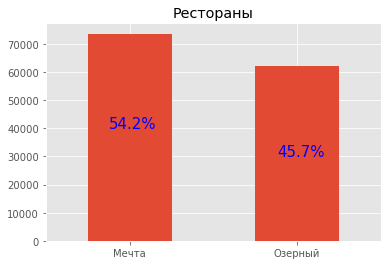

In [12]:
Sale['rest_code'].value_counts().plot(kind='bar')
#Добавляем подпись
plt.title(u'Рестораны')
plt.xticks([0, 1], ['Мечта', 'Озерный'], rotation=None)
plt.text(-0.125, 40000, '54.2%', fontsize=15, color='blue')
plt.text(0.88, 30000, '45.7%', fontsize=15, color='blue');

In [13]:
Product_and_Sale = Product.merge(Sale, on='product_code')

In [14]:
Product_and_Sale.head()

,product_code,product_name,Unnamed: 2,Unnamed: 3,date,rest_code,product_count
0,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN,06.01.2009,Озерный,7
1,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN,07.01.2009,Озерный,2
2,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN,08.01.2009,Озерный,5
3,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN,09.01.2009,Озерный,8
4,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN,10.01.2009,Озерный,8


In [15]:
Product_and_Sale['product_name'].value_counts()

Кофе Латте 300мл             6666
Кофе АМЕРИКАНО 90мл          5248
Карамельный кофе 230мл       4209
Кофе ЭСПРЕССО  30 мл         3628
Чай Ассам Нонаипара 500мл    3435
                             ... 
Пирожное Руби 80г              26
Десерт Манифик 100г            21
Пирожное А-380 65г             11
Чай черн с суш мятой500мл       8
РАФ Кофе 250мл                  1
Name: product_name, Length: 110, dtype: int64

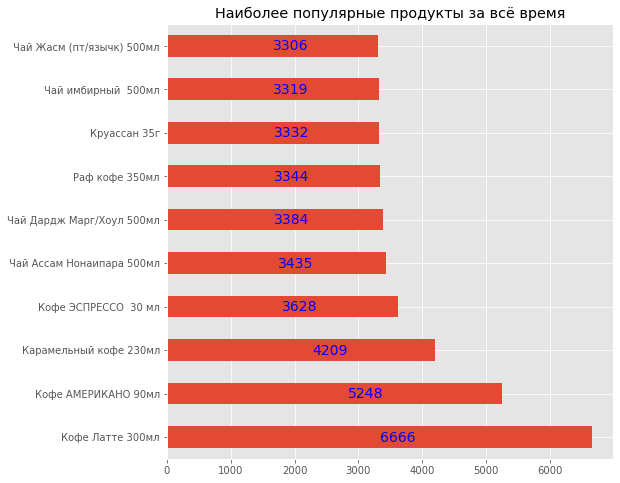

In [16]:
prob = Product_and_Sale['product_name'].value_counts()

threshold = 3305
mask = prob > threshold
prob = prob[mask]
prob.plot(kind='barh', figsize=(8,8))

plt.text(1665, 8.9, prob.values[9], fontsize=14, color='blue')
plt.text(1668, 7.9, prob.values[8], fontsize=14, color='blue')
plt.text(1670, 6.9, prob.values[7], fontsize=14, color='blue')
plt.text(1675, 5.9, prob.values[6], fontsize=14, color='blue')
plt.text(1676, 4.9, prob.values[5], fontsize=14, color='blue')
plt.text(1735, 3.9, prob.values[4], fontsize=14, color='blue')
plt.text(1801, 2.9, prob.values[3], fontsize=14, color='blue')
plt.text(2275, 1.9, prob.values[2], fontsize=14, color='blue')
plt.text(2837, 0.9, prob.values[1], fontsize=14, color='blue')
plt.text(3344, -0.1, prob.values[0], fontsize=14, color='blue')

plt.title(u'Наиболее популярные продукты за всё время')
plt.xticks(rotation=None)
plt.show()

In [17]:
Product_and_Sale.loc[Product_and_Sale['rest_code'] == 'Озерный', 'product_name'].value_counts()

Кофе Латте 300мл             3322
Кофе АМЕРИКАНО 90мл          2411
Карамельный кофе 230мл       1934
Кофе ЭСПРЕССО  30 мл         1893
Чай Ассам Нонаипара 500мл    1760
                             ... 
Десерт Манифик 100г             8
Пирожное А-380 65г              5
Раф кофе соя 300мл              4
РАФ Кофе 250мл                  1
Фильтр кофе 230мл               1
Name: product_name, Length: 107, dtype: int64

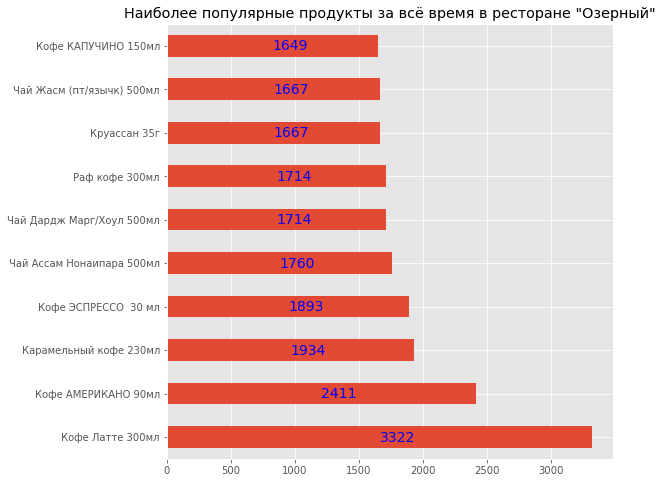

In [18]:
prob = Product_and_Sale.loc[Product_and_Sale['rest_code'] == 'Озерный', 'product_name'].value_counts()

threshold = 1645
mask = prob > threshold
prob = prob[mask]
prob.plot(kind='barh', figsize=(8,8))

plt.text(824.5, 8.9, prob.values[9], fontsize=14, color='blue')
plt.text(833.5, 7.9, prob.values[8], fontsize=14, color='blue')
plt.text(833.5, 6.9, prob.values[7], fontsize=14, color='blue')
plt.text(857, 5.9, prob.values[6], fontsize=14, color='blue')
plt.text(857, 4.9, prob.values[5], fontsize=14, color='blue')
plt.text(880, 3.9, prob.values[4], fontsize=14, color='blue')
plt.text(946.5, 2.9, prob.values[3], fontsize=14, color='blue')
plt.text(967, 1.9, prob.values[2], fontsize=14, color='blue')
plt.text(1205.5, 0.9, prob.values[1], fontsize=14, color='blue')
plt.text(1661, -0.1, prob.values[0], fontsize=14, color='blue')

plt.title(u'Наиболее популярные продукты за всё время в ресторане "Озерный"')
plt.xticks(rotation=None)
plt.show()

In [19]:
Product_and_Sale.loc[Product_and_Sale['rest_code'] == 'Мечта', 'product_name'].value_counts()

Кофе Латте 300мл           3344
Кофе АМЕРИКАНО 90мл        2837
Карамельный кофе 230мл     2275
Раф кофе 350мл             1801
Кофе ЭСПРЕССО  30 мл       1735
                           ... 
Мега эклер 240г              28
Карамельный кофе 380 мл      18
Пирожное Руби 80г            15
Десерт Манифик 100г          13
Пирожное А-380 65г            6
Name: product_name, Length: 106, dtype: int64

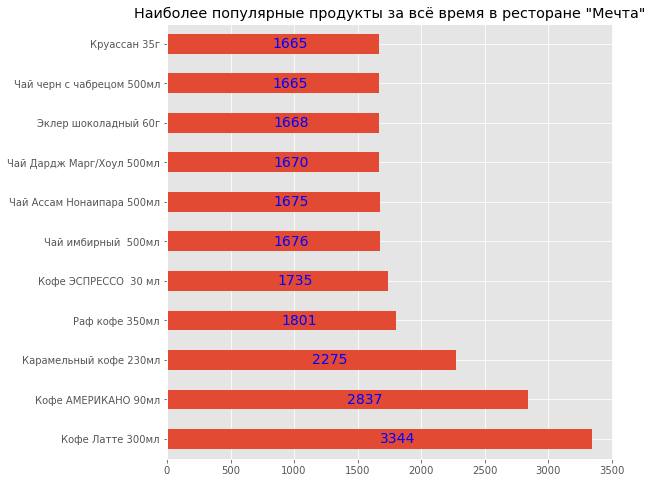

In [20]:
prob = Product_and_Sale.loc[Product_and_Sale['rest_code'] == 'Мечта', 'product_name'].value_counts()

threshold = 1664
mask = prob > threshold
prob = prob[mask]
prob.plot(kind='barh', figsize=(8,8))

plt.text(832.5, 9.9, prob.values[10], fontsize=14, color='blue')
plt.text(832.5, 8.9, prob.values[9], fontsize=14, color='blue')
plt.text(834, 7.9, prob.values[8], fontsize=14, color='blue')
plt.text(835, 6.9, prob.values[7], fontsize=14, color='blue')
plt.text(837.5, 5.9, prob.values[6], fontsize=14, color='blue')
plt.text(838, 4.9, prob.values[5], fontsize=14, color='blue')
plt.text(867.5, 3.9, prob.values[4], fontsize=14, color='blue')
plt.text(900.5, 2.9, prob.values[3], fontsize=14, color='blue')
plt.text(1137.5, 1.9, prob.values[2], fontsize=14, color='blue')
plt.text(1418.5, 0.9, prob.values[1], fontsize=14, color='blue')
plt.text(1672, -0.1, prob.values[0], fontsize=14, color='blue')

plt.title(u'Наиболее популярные продукты за всё время в ресторане "Мечта"')
plt.xticks(rotation=None)
plt.show()

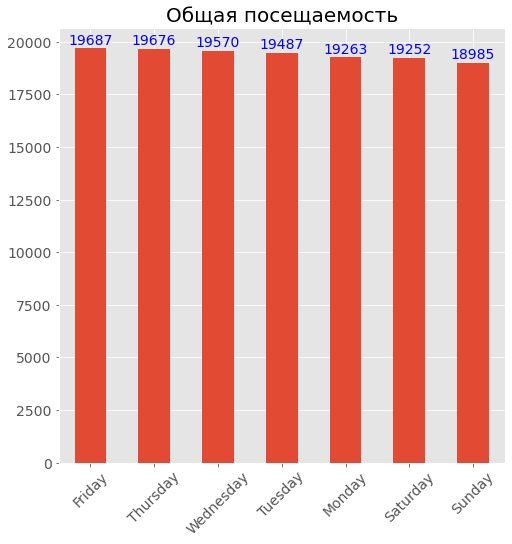

In [21]:
Product_and_Sale['date'] = pd.to_datetime(Product_and_Sale['date'])
prob = Product_and_Sale['date'].dt.day_name().value_counts()

prob.plot(kind='bar', figsize=(8,8))
plt.title('Общая посещаемость', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.text(-0.35, 19887, prob.values[0], fontsize=14, color='blue')
plt.text(0.65, 19876, prob.values[1], fontsize=14, color='blue')
plt.text(1.65, 19770, prob.values[2], fontsize=14, color='blue')
plt.text(2.65, 19687, prob.values[3], fontsize=14, color='blue')
plt.text(3.65, 19463, prob.values[4], fontsize=14, color='blue')
plt.text(4.65, 19452, prob.values[5], fontsize=14, color='blue')
plt.text(5.65, 19185, prob.values[6], fontsize=14, color='blue')

plt.ylabel("");

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.5, 1))

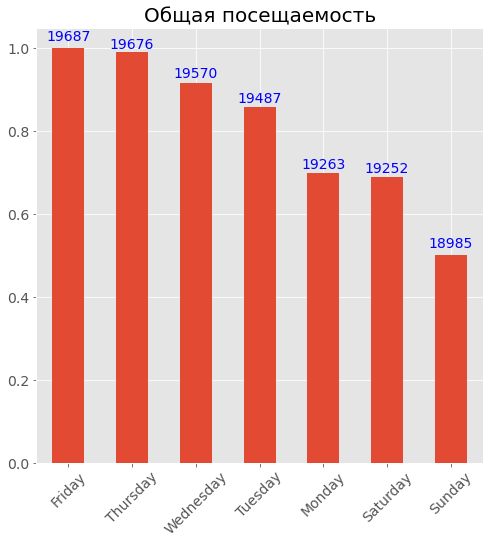

In [23]:
prob = Product_and_Sale['date'].dt.day_name().value_counts()
prob.loc[:,] = scaler.fit_transform(prob.values.reshape(-1, 1)).flatten()

prob.plot(kind='bar', figsize=(8,8))
plt.title('Общая посещаемость', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.text(-0.35, 1.02, 19687, fontsize=14, color='blue')
plt.text(0.65, 1, 19676, fontsize=14, color='blue')
plt.text(1.65, 0.93, 19570, fontsize=14, color='blue')
plt.text(2.65, 0.87, 19487, fontsize=14, color='blue')
plt.text(3.65, 0.71, 19263, fontsize=14, color='blue')
plt.text(4.65, 0.7, 19252, fontsize=14, color='blue')
plt.text(5.65, 0.52, 18985, fontsize=14, color='blue')

plt.ylabel("");

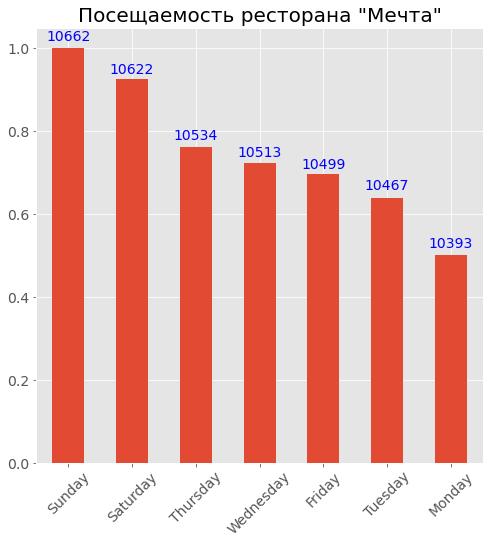

In [24]:
prob = Product_and_Sale.loc[Product_and_Sale['rest_code'] == 'Мечта', 'date'].dt.day_name().value_counts()
prob.loc[:,] = scaler.fit_transform(prob.values.reshape(-1, 1)).flatten()

prob.plot(kind='bar', figsize=(8,8))
plt.title('Посещаемость ресторана "Мечта"', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.text(-0.35, 1.02, 10662, fontsize=14, color='blue')
plt.text(0.65, 0.94, 10622, fontsize=14, color='blue')
plt.text(1.65, 0.78, 10534, fontsize=14, color='blue')
plt.text(2.65, 0.74, 10513, fontsize=14, color='blue')
plt.text(3.65, 0.71, 10499, fontsize=14, color='blue')
plt.text(4.65, 0.66, 10467, fontsize=14, color='blue')
plt.text(5.65, 0.52, 10393, fontsize=14, color='blue')

plt.ylabel("");

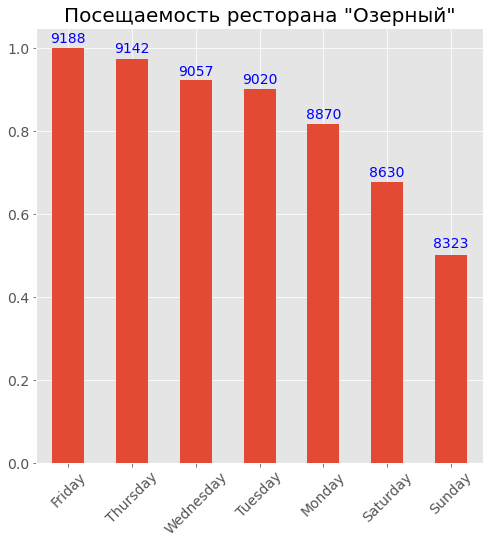

In [25]:
prob = Product_and_Sale.loc[Product_and_Sale['rest_code'] == 'Озерный', 'date'].dt.day_name().value_counts()
prob.loc[:,] = scaler.fit_transform(prob.values.reshape(-1, 1)).flatten()

prob.plot(kind='bar', figsize=(8,8))
plt.title('Посещаемость ресторана "Озерный"', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.text(-0.28, 1.015, 9188, fontsize=14, color='blue')
plt.text(0.72, 0.99, 9142, fontsize=14, color='blue')
plt.text(1.72, 0.935, 9057, fontsize=14, color='blue')
plt.text(2.72, 0.915, 9020, fontsize=14, color='blue')
plt.text(3.72, 0.83, 8870, fontsize=14, color='blue')
plt.text(4.72, 0.69, 8630, fontsize=14, color='blue')
plt.text(5.72, 0.52, 8323, fontsize=14, color='blue')

plt.ylabel("");